Roger Apéry's proof of the irrationality of ζ(3) (the Riemann zeta function evaluated at 3)
* 🚀 📚


Tutor: Anthropic's AI Claude

"""
Title: Irrationality of ζ2 and ζ3
Author: Roger Apéry
Source: Société Mathématique de France, Astérisque 61 (1979) p. 11-13

General Method:
The method for proving irrationality of a real number α defined by partial sums σn
of a series of rationals involves these steps:

1. Replace sequence σn = u0,n with a double-indexed sequence uk,n where 0≤k≤n
   such that for each k, uk,n converges to α faster than uk-1,n

2. Set uk,n = tk,n/(n+k choose k)

3. Bound the denominator of tk,n as a function of n only:
   Show there exists sequence of integers pn where pn*tk,n is integer and pn ≤ μ^(n+ε)

4. Perform same linear combination (depending on n) with integer coefficients on
   column n of tk,n and (n+k choose k)

5. Obtain sequence vn/un of fractions with rational numerator and integer denominator
   Determine common limit λ of nth root of vn and un

6. If lucky, λ > μ: can conclude irrationality
   Can also deduce irrationality measure: for any integers p,q:
   |p/q - α| > 1/(q^(1+ε))

For ζ(2):
- Series expansion: 1/n² = 1/(n(n-1)) - 1/(n(n-1)(n-2)) + ... + (-1)^(k-1)k!/(n(n-1)...(n-k+1)) + ...
- μ = e²
- un sequence: (1,3,19,147,1251,11253,...)
- vn sequence: (0,5,125/4,...)
- Recurrence: (n+1)²un+1 - (11n²+11n+3)un - (n-1)²un-1 = 0
- λ = (11+5√5)/2
- Irrationality of ζ(2)=π²/6 known since Euler, but method gives irrationality measure

For ζ(3):
- Series expansion: 1/n³ = 1/(n(n²-1)) - 1/(n(n²-1)(n²-4)) + ... + (-1)^k(k!)²/(n(n²-1)...(n²-(k+1)²)) + ...
- Expression: ζ(3) = 5/2 Σ (-1)^(n-1)/(n³(2n choose n))
- μ = e³
- un sequence: (1,5,73,1445,33001,...)
- vn sequence: (0,6,351/4,62531/36,...)
- Recurrence: (n+1)³un+1 - (34n³+51n²+27n+5)un + n³un-1 = 0
- λ = 17+12√2

Author contact:
Roger APERY
Département de Mathématiques
Esplanade de la Paix
14032 CAEN CEDEX
"""

A Python script to visualize the series expansion for 1/n³, showing how the partial sums converge as we add more terms.



This script:

1. Defines functions to compute individual terms and partial sums of the series
2. Creates a visualization showing how the approximation improves with more terms
3. Plots different partial sums against the actual value 1/n³
4. Shows relative errors for different numbers of terms
5. Includes a numerical verification section

The visualization will show how adding more terms improves the approximation, with different colors representing different numbers of terms in the partial sum. The dashed black line shows the actual value of 1/n³ for reference.



Computing series expansion for 1/n³...


<ipython-input-1-89db779d68ea>:14: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator
<ipython-input-1-89db779d68ea>:18: RuntimeWarning: invalid value encountered in scalar add
  return sum(compute_term(n, k) for k in range(K))


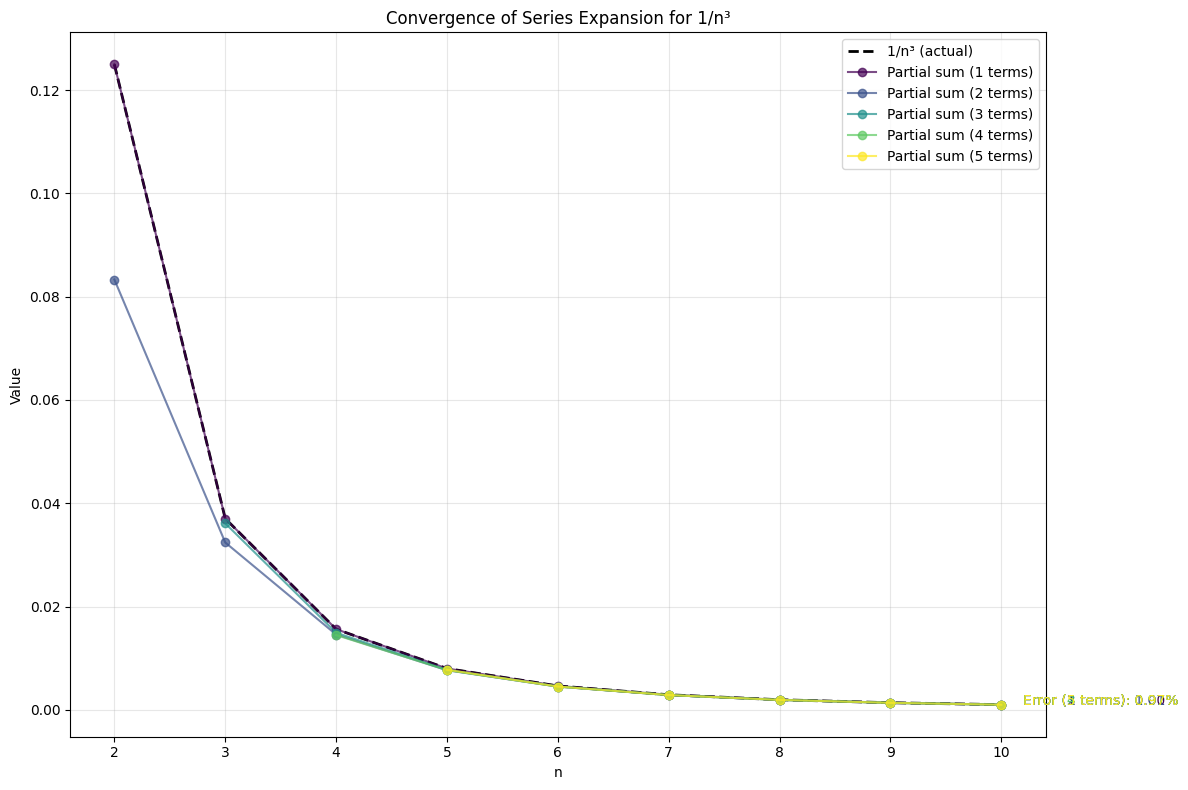


Detailed breakdown for n = 5:
Actual value of 1/5³ = 0.00800000
Approximation with 1 terms: 0.00800000
Approximation with 2 terms: 0.00766667
Approximation with 3 terms: 0.00773016
Approximation with 4 terms: 0.00769444
Approximation with 5 terms: 0.00775794


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def compute_term(n, k):
    """Compute the k-th term of the series for a given n."""
    numerator = (-1)**k * (factorial(k))**2

    # Compute denominator by multiplying all factors
    denominator = n
    for i in range(k+1):
        denominator *= (n**2 - i**2)

    return numerator / denominator

def partial_sum(n, K):
    """Compute partial sum up to K terms for given n."""
    return sum(compute_term(n, k) for k in range(K))

def plot_convergence():
    # Parameters
    n_values = np.arange(2, 11)  # Values of n to test
    K_max = 5  # Maximum number of terms in partial sum

    plt.figure(figsize=(12, 8))

    # Plot 1/n³ for reference
    plt.plot(n_values, 1/n_values**3, 'k--', label='1/n³ (actual)', linewidth=2)

    # Plot partial sums for different numbers of terms
    colors = plt.cm.viridis(np.linspace(0, 1, K_max))
    for K in range(1, K_max + 1):
        approximations = [partial_sum(n, K) for n in n_values]
        plt.plot(n_values, approximations, '-o',
                label=f'Partial sum ({K} terms)',
                color=colors[K-1], alpha=0.7)

    plt.xlabel('n')
    plt.ylabel('Value')
    plt.title("Convergence of Series Expansion for 1/n³")
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Add text showing relative error for n=10
    n_test = 10
    actual = 1/n_test**3
    for K in range(1, K_max + 1):
        approx = partial_sum(n_test, K)
        rel_error = abs((approx - actual)/actual) * 100
        plt.text(1.02*max(n_values), approx,
                f'Error ({K} terms): {rel_error:.2f}%',
                color=colors[K-1])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example usage
    print("Computing series expansion for 1/n³...")
    plot_convergence()

    # Print some specific values for verification
    n_test = 5
    print(f"\nDetailed breakdown for n = {n_test}:")
    print(f"Actual value of 1/{n_test}³ = {1/n_test**3:.8f}")
    for K in range(1, 6):
        approx = partial_sum(n_test, K)
        print(f"Approximation with {K} terms: {approx:.8f}")